In [124]:
import pandas as pd

In [125]:
H = pd.read_csv("hofmarcher_results.csv")
H

,Assay,ResNet,DenseNet,GapNet,M-CNN,MIL-Net,SC-CNN,FNN
0,CHEMBL1040691,0.382,0.354,0.400,0.344,0.336,0.390,0.546
1,CHEMBL1614544,0.714,0.687,0.679,0.722,0.725,0.616,0.606
2,CHEMBL1613914,0.544,0.534,0.511,0.547,0.508,0.565,0.402
3,CHEMBL1613836,0.492,0.466,0.448,0.461,0.503,0.401,0.511
4,CHEMBL1613838,0.436,0.496,0.434,0.480,0.552,0.491,0.578
...,...,...,...,...,...,...,...,...
204,CHEMBL3214913,0.839,0.881,0.856,0.764,0.731,0.799,0.623
205,CHEMBL3214967,0.761,0.822,0.856,0.719,0.670,0.739,0.708
206,CHEMBL3214906,0.562,0.650,0.547,0.482,0.574,0.550,0.483
207,CHEMBL3214970,0.828,0.812,0.801,0.719,0.721,0.716,0.584


In [126]:
S = pd.read_csv("median_auc_scores.csv")
S

,CHEMBL_ID,Cel_counter_model
0,CHEMBL1040691,0.478261
1,CHEMBL1614441,0.589474
2,CHEMBL1963901,0.589286
3,CHEMBL1963903,0.435484
4,CHEMBL1963911,0.598039
...,...,...
204,CHEMBL1963885,0.595546
205,CHEMBL1963887,0.583333
206,CHEMBL1963889,0.375000
207,CHEMBL1963895,0.473118


In [127]:
results = H
results["Cel_counter_model"] = S["Cel_counter_model"]
results

,Assay,ResNet,DenseNet,GapNet,M-CNN,MIL-Net,SC-CNN,FNN,Cel_counter_model
0,CHEMBL1040691,0.382,0.354,0.400,0.344,0.336,0.390,0.546,0.478261
1,CHEMBL1614544,0.714,0.687,0.679,0.722,0.725,0.616,0.606,0.589474
2,CHEMBL1613914,0.544,0.534,0.511,0.547,0.508,0.565,0.402,0.589286
3,CHEMBL1613836,0.492,0.466,0.448,0.461,0.503,0.401,0.511,0.435484
4,CHEMBL1613838,0.436,0.496,0.434,0.480,0.552,0.491,0.578,0.598039
...,...,...,...,...,...,...,...,...,...
204,CHEMBL3214913,0.839,0.881,0.856,0.764,0.731,0.799,0.623,0.595546
205,CHEMBL3214967,0.761,0.822,0.856,0.719,0.670,0.739,0.708,0.583333
206,CHEMBL3214906,0.562,0.650,0.547,0.482,0.574,0.550,0.483,0.375000
207,CHEMBL3214970,0.828,0.812,0.801,0.719,0.721,0.716,0.584,0.473118


In [128]:
results[results["FNN"]>1]

,Assay,ResNet,DenseNet,GapNet,M-CNN,MIL-Net,SC-CNN,FNN,Cel_counter_model


In [129]:
# Melt the DataFrame
melted_df = pd.melt(results, id_vars="Assay", var_name="Method", value_name="Score")
melted_df

,Assay,Method,Score
0,CHEMBL1040691,ResNet,0.382000
1,CHEMBL1614544,ResNet,0.714000
2,CHEMBL1613914,ResNet,0.544000
3,CHEMBL1613836,ResNet,0.492000
4,CHEMBL1613838,ResNet,0.436000
...,...,...,...
1667,CHEMBL3214913,Cel_counter_model,0.595546
1668,CHEMBL3214967,Cel_counter_model,0.583333
1669,CHEMBL3214906,Cel_counter_model,0.375000
1670,CHEMBL3214970,Cel_counter_model,0.473118


In [130]:
melted_df.Method.unique()

array(['ResNet', 'DenseNet', 'GapNet', 'M-CNN', 'MIL-Net', 'SC-CNN',
       'FNN', 'Cel_counter_model'], dtype=object)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

FNN v.s. Cel_counter_model: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.142e-13 U_stat=3.119e+04
ResNet v.s. FNN: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.527e-03 U_stat=2.596e+04
ResNet v.s. Cel_counter_model: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.019e-24 U_stat=3.457e+04


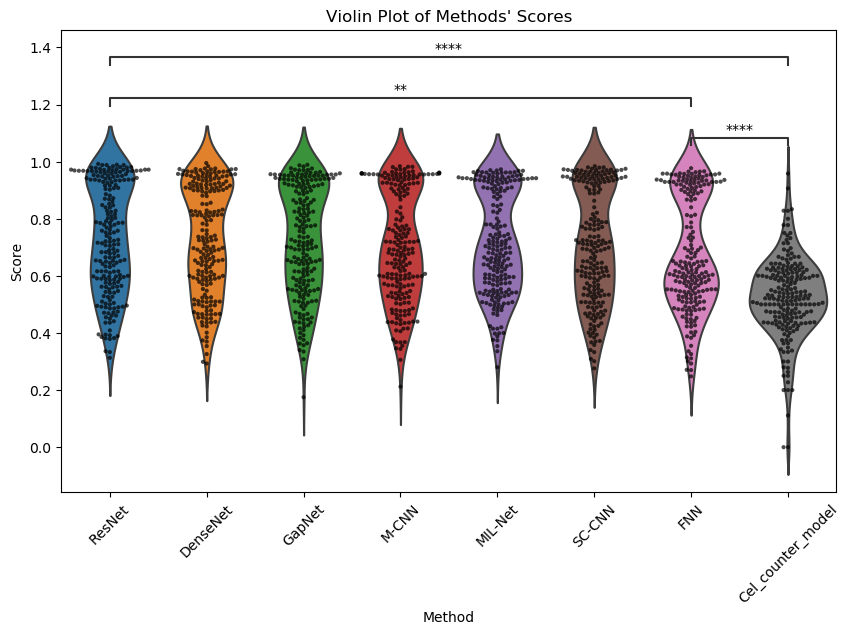

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

# Assuming 'melted_df' is your dataframe
plt.figure(figsize=(10, 6))

# Create the violin plot
sns.violinplot(x="Method", y="Score", data=melted_df, inner=None)

# Add the swarm plot with smaller dots
sns.swarmplot(x="Method", y="Score", data=melted_df, color="k", alpha=0.7, size=3)

# Rotate the x-ticks for better readability
plt.xticks(rotation=45)

# Set the title of the plot
plt.title("Violin Plot of Methods' Scores")

# Add statistical annotations
add_stat_annotation(plt.gca(), data=melted_df, x="Method", y="Score",
                    box_pairs=[("ResNet", "FNN"), ("ResNet", "Cel_counter_model"), ("FNN", "Cel_counter_model")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)

# Display the plot
plt.show()
